## Installation

To perform Multiple Correspondence Analysis, this analysis makes use of the Prince library. If the library has not been installed by running the requirements.txt installation, please install the library using the code block below. Additionally, ensure that both .csv datasets are in the same directory as this notebook.

In [ ]:
!pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 kB 20.7 MB/s eta 0:00:00


## Imports

All libraries required for the analysis are imported here.

In [ ]:
# Import standard libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Import Prince library for MCA
import prince

In [ ]:
# Importing the clustering libraries
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
# Importing the decision tree libraries
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
from sklearn import tree

## Loading the data

The data for both assignments is retrieved as a DataFrame object using the Pandas library. Even though this notebook will analyse the assignment 2 dataset, the notebook needs to have access to both assignment datasets. To ensure that the analysis only includes students that made both assignment 1 and assignment 2, only entries with overlapping student IDs are included.

In [ ]:
# Load in student assignment 2 dataset
df_a1 = pd.read_csv('Assignment1_data_full.csv')
df_a2 = pd.read_csv('Assignment2_data_full.csv')

# Exclude non-overlapping entries
df_a1 = df_a1[df_a1['0'].isin(df_a2['0'])]
df_a2 = df_a2[df_a2['0'].isin(df_a1['0'])]

# Drop student ID column
df_a1 = df_a1.drop('0', axis=1)
df_a2 = df_a2.drop('0', axis=1)
df_a2

,Problem 15_0,Problem 15_1,Problem 15_2,Problem 15_3,Problem 18_0,Problem 18_1,Problem 18_2,Problem 18_3,Problem 19_0,Problem 19_1,...,Problem 16_1,Problem 16_2,Problem 16_3,Problem 17_0,Problem 17_1,Problem 17_2,Problem 22_0,Problem 22_1,Problem 22_2,Problem 22_3
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
181,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1.0,1.0,0.0
183,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN


Missing values indicate that students did not answer the question corresponding to that respective column. These values are marked as 0 indicating a false answer.

In [ ]:
# Maintain dataset with 2 categories, fill NaNs with 0
df_2cat = df_a2.fillna(0)
df_2cat

,Problem 15_0,Problem 15_1,Problem 15_2,Problem 15_3,Problem 18_0,Problem 18_1,Problem 18_2,Problem 18_3,Problem 19_0,Problem 19_1,...,Problem 16_1,Problem 16_2,Problem 16_3,Problem 17_0,Problem 17_1,Problem 17_2,Problem 22_0,Problem 22_1,Problem 22_2,Problem 22_3
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
181,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
182,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
183,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


## Multiple Correspondence Analysis

To reduce the dimensionality of the data, this analysis makes use of Multiple Correspondence Analysis (MCA). MCA is similar to Principal Component Analysis (PCA), but designed for categorical variables.

In [ ]:
# Create MCA instance
mca_2cat = prince.MCA(
    n_components=56,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Fit instance on 2-category DataFrame
mca_2cat.fit(df_2cat)

MCA(n_components=56, n_iter=3, random_state=42)

The analysis will use the component that has a cumulative variance percentage of over 80%.

In [ ]:
# Retrieve summary of eigenvalues
mca_2cat.eigenvalues_summary.head(15)

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.267,26.69%,26.69%
1,0.092,9.23%,35.91%
2,0.068,6.81%,42.73%
3,0.057,5.71%,48.43%
4,0.055,5.48%,53.92%
5,0.047,4.71%,58.63%
6,0.041,4.13%,62.75%
7,0.040,4.03%,66.78%
8,0.032,3.16%,69.94%


In this case, the 13th component explains over 80% of the variance. This is visualized by the following cumulative variance plot:

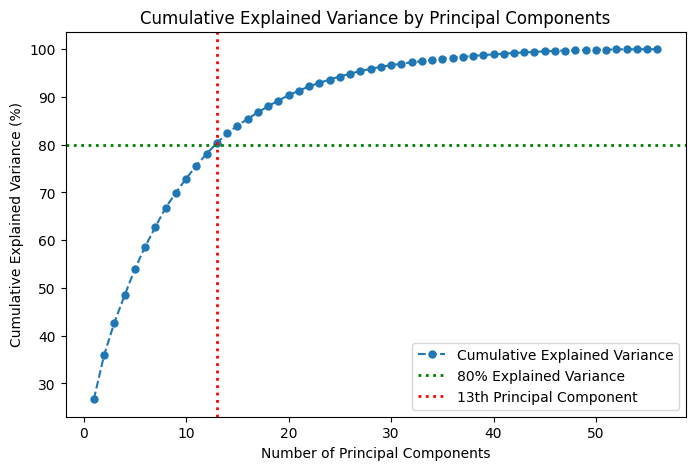

In [ ]:
# Calculate cumulative explained variance
cumulative_explained_variance = mca_2cat.cumulative_percentage_of_variance_

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', markersize=5, linestyle='--', color='C0', label='Cumulative Explained Variance')

# Add a green dotted line at 80% explained variance
plt.axhline(y=80, color='green', linestyle='dotted', linewidth=2, label='80% Explained Variance')
plt.axvline(x=13, color='red', linestyle='dotted', linewidth=2, label = '13th Principal Component')

# Add labels and title
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.legend()
plt.show()

The coordinates of the first 14 coordinates in the latent space are retrieved for all data entries. This represents the reduced dimensionality data.

In [ ]:
# Retrieve Principal Components
row_coordinates = mca_2cat.row_coordinates(df_2cat).iloc[:, 0:13]
row_coordinates

,0,1,2,3,4,5,6,7,8,9,10,11,12
2,0.496056,-0.582450,0.293377,-0.146813,0.094321,0.034333,0.449123,-0.069873,0.322492,0.003354,0.467185,-0.081186,-0.202485
3,0.363106,-0.243019,-0.306395,0.338893,-0.412711,0.059445,-0.336958,0.111166,0.595917,-0.060064,0.207750,0.013612,0.123626
4,-0.497018,-0.021637,0.107138,0.031606,0.071490,0.324235,0.022185,-0.381561,-0.044007,-0.069157,-0.140573,-0.112274,0.215729
6,-0.481064,0.002729,0.052783,-0.064641,0.156755,-0.144308,-0.118595,-0.111106,0.052581,0.305114,-0.087632,0.020329,-0.072256
7,-0.393625,0.011331,0.122810,-0.121616,-0.277249,0.065997,0.273566,0.117911,0.178773,0.096561,-0.039215,0.099803,0.023110
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,-0.219482,0.037332,0.513575,-0.118342,-0.384586,0.153182,-0.299516,0.211256,-0.044750,0.046401,-0.044719,0.061174,-0.056656
181,0.930978,0.591809,0.175101,0.404125,0.110067,0.489538,0.132127,0.407902,-0.114847,0.066163,-0.068843,-0.004065,0.044879
182,-0.175560,0.214901,0.365278,0.187815,-0.217780,0.210825,0.031571,-0.308752,-0.243662,0.013553,-0.057008,-0.093030,-0.159680
183,0.904362,-0.332383,-0.043157,0.489016,-0.175279,0.274589,-0.257610,0.534699,-0.002019,0.183957,0.245733,0.068796,0.057182


## Creating the dendrogram

After preprocessing the data, the dendrogram can be created. First, a linkage matrix is computed using Ward's method. This linkage matrix represents the hierarchical relationships between the data. The linkage matrix is used to plot a dendrogram.

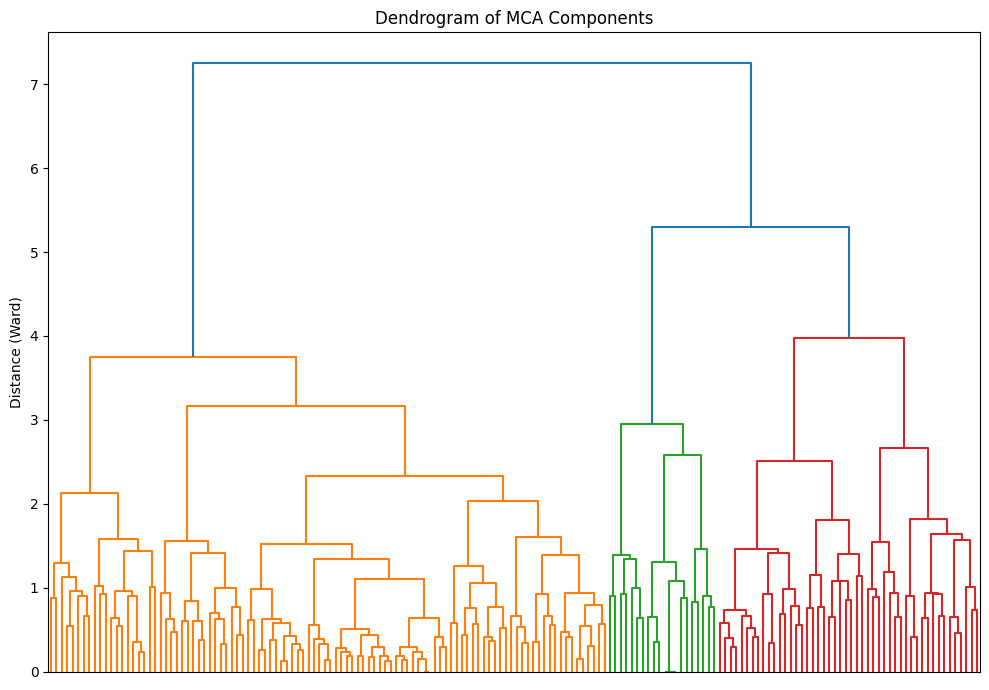

In [ ]:
# Create linkage matrix using Ward's method
linkage_matrix = linkage(row_coordinates, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)

# Remove sample indices to declutter plot
plt.xticks([])

plt.title('Dendrogram of MCA Components')
plt.ylabel('Distance (Ward)')
plt.tight_layout()
plt.show()

## Computing the Silhouette Score

To evaluate the clustering, the Silhouette Score is computed. Silhouette Score measures how well the clustered data points fit in their assigned cluster compared to other clusters.

The metric is first computed for all possible height cutoffs from 6 to 1.

<ipython-input-13-4bb16938f9f4>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


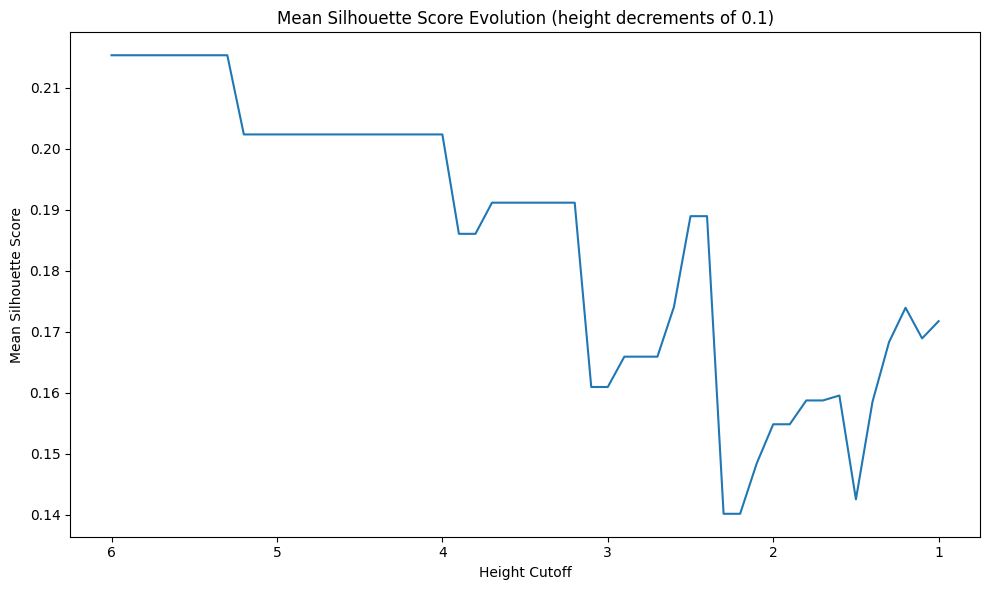

In [ ]:
# Keep track of Silhouette score
silhouette_evolution = []

for i in np.arange(6, 0.9, -0.1):
  # Retrieve cluster labels
  h = fcluster(linkage_matrix, t=i, criterion='distance')

  # Calculate the Silhouette score
  s = silhouette_score(row_coordinates, h)
  silhouette_evolution.append(s)

# Plotting Silhouette score
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 6.1, 0.1), silhouette_evolution, marker='', linestyle='solid', label='Silhouette Score')

# Mirror x ticks
ax = plt.gca()
current_ticks = ax.get_xticks()
new_labels = np.arange(7, 0, -1)
ax.set_xticklabels(new_labels)

plt.title('Mean Silhouette Score Evolution (height decrements of 0.1)')
plt.xlabel('Height Cutoff')
plt.ylabel('Mean Silhouette Score')
plt.tight_layout()
plt.show()

Additionally, the Silhouette Score is computed for non-stationary height cutoffs. These represent height cutoffs where the Silhouette Score changes compared to the previous height cutoff value (steps of 0.01).

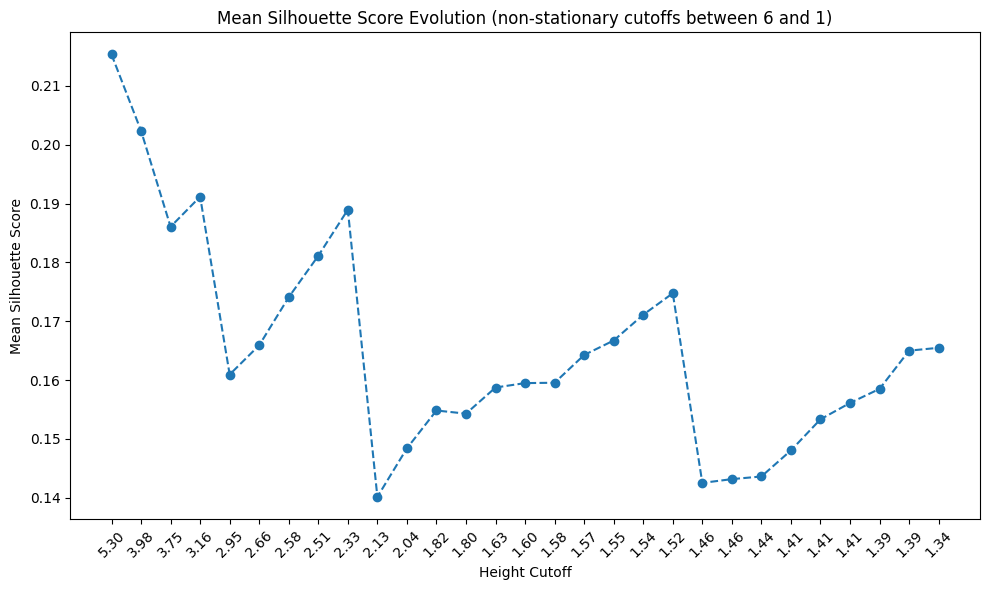

In [ ]:
# Retrieve the non-stationary height cutoffs in decreasing order
merge_heights = linkage_matrix[:, 2]
sorted_heights = np.sort(merge_heights)[::-1]

# Keep track of Silhouette Score
silhouette_evolution = []

for i in sorted_heights[1:30]:
  # Retrieve cluster labels
  h = fcluster(linkage_matrix, t=i, criterion='distance')

  # Calculate the Silhouette score
  s = silhouette_score(row_coordinates, h)
  silhouette_evolution.append(s)

# Plotting Silhouette score
plt.figure(figsize=(10, 6))
plt.plot(range(len(sorted_heights[1:30])), silhouette_evolution, marker='o', linestyle='--', label='Silhouette Score')
plt.xticks(range(len(sorted_heights[1:30])), ['%.2f' % elem for elem in sorted_heights[1:30]], rotation=45)
plt.title('Mean Silhouette Score Evolution (non-stationary cutoffs between 6 and 1)')
plt.xlabel('Height Cutoff')
plt.ylabel('Mean Silhouette Score')
plt.tight_layout()
plt.show()

## Computing the Cophenetic Correlation Coefficient

The Cophenetic Correlation Coefficient can be computed from the linkage matrix. The metric evaluates how well the dendrogram preserves the pairwise distances between the original data points. This indicates the quality of the dendrogram. Values close to 1 indicate that the dendrogram accurately represents the pairwise distances.

In [ ]:
# Compute pairwise distances (Euclidean)
dist_matrix = pdist(row_coordinates)

# Compute Cophenetic Correlation Coefficient
coph_corr, _ = cophenet(linkage_matrix, dist_matrix)

print(f'Cophenetic Correlation Coefficient: {coph_corr:.4f}')

Cophenetic Correlation Coefficient: 0.6201


## Choosing a height cutoff point

After observing Silhouette Score and Mutual Information metrics (see comparison Jupyter notebook), a height cutoff is chosen for the post-clustering decision tree. The chosen cutoff point for the dendrogram of assignment 2 is 5.1.

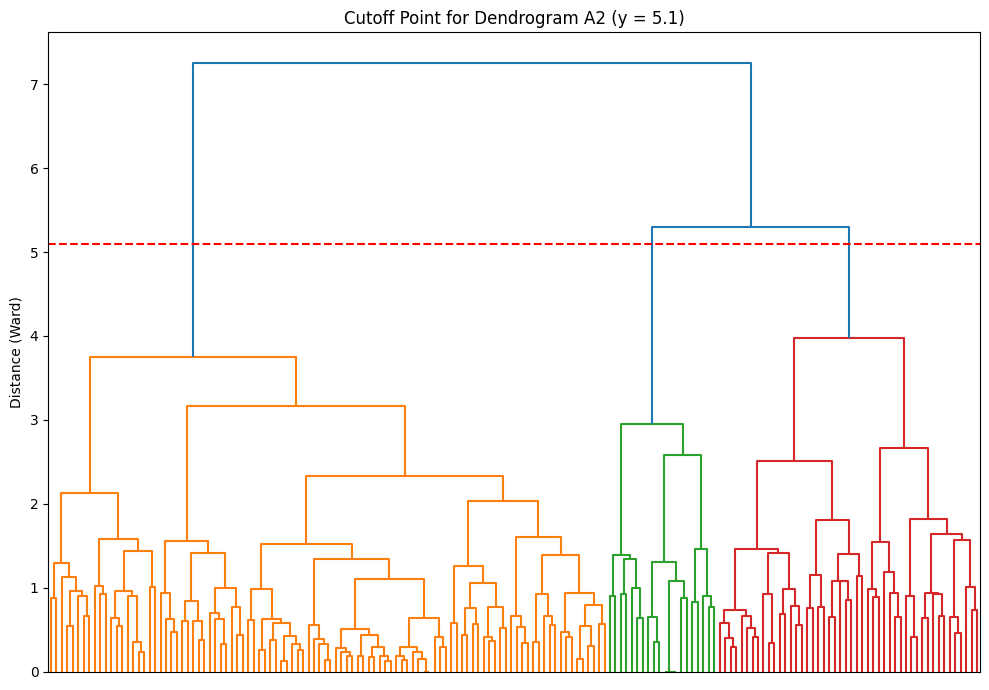

In [ ]:
# Plot the dendrogram to visualize the cutoff point
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)

# Remove sample indices to declutter plot
plt.xticks([])

plt.title('Cutoff Point for Dendrogram A2 (y = 5.1)')
plt.ylabel('Distance (Ward)')
plt.axhline(y=5.1, c='red', linestyle='--')
plt.tight_layout()
plt.show()

The cluster labels for height cutoff 5.1 are retrieved and added to the corresponding data entries.

In [ ]:
# Retrieve students' clusterings for depth 5.1
labels = fcluster(linkage_matrix, t=5.1, criterion='distance')
df_interpret = df_2cat.copy()
df_interpret['cluster'] = labels
df_interpret

,Problem 15_0,Problem 15_1,Problem 15_2,Problem 15_3,Problem 18_0,Problem 18_1,Problem 18_2,Problem 18_3,Problem 19_0,Problem 19_1,...,Problem 16_2,Problem 16_3,Problem 17_0,Problem 17_1,Problem 17_2,Problem 22_0,Problem 22_1,Problem 22_2,Problem 22_3,cluster
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3
3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1
6,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
7,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1
181,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
182,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
183,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2


The different cluster sizes are displayed for comparison.

In [ ]:
# Compare cluster sizes
cluster_sizes = df_interpret['cluster'].value_counts().sort_index().to_frame()
cluster_sizes['fraction'] = cluster_sizes['count'] / cluster_sizes['count'].sum()
cluster_sizes['fraction'] = cluster_sizes['fraction'].apply(lambda x: '{:.2%}'.format(x))
cluster_sizes

,count,fraction
cluster,,
1,102,60.00%
2,20,11.76%
3,48,28.24%


The percentage of correctly answered questions is displayed for each cluster. This gives an overview of the cluster structure.

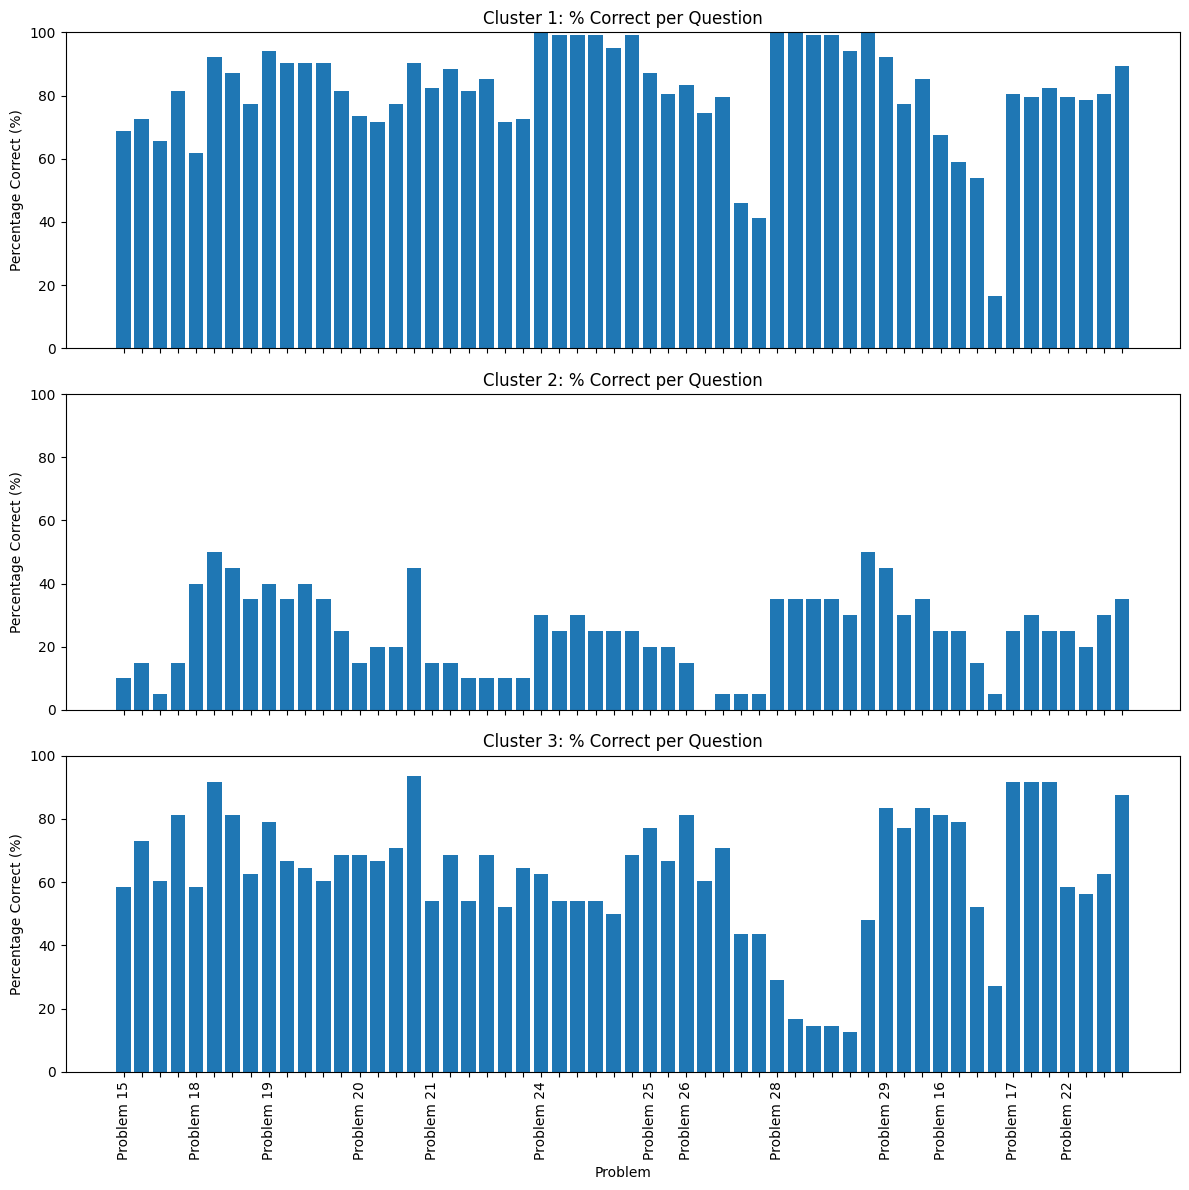

In [ ]:
# Filter questions and clusters
question_cols = [col for col in df_interpret.columns if col != 'cluster']
clusters = sorted(df_interpret['cluster'].unique())

# Extract prblem namings
problem_groups = [col.split('_')[0] for col in question_cols]

# Show x label for changing problems
x_tick_labels = []
prev_problem = None
for prob in problem_groups:
    if prob != prev_problem:
        x_tick_labels.append(prob)
        prev_problem = prob
    else:
        x_tick_labels.append("")  # empty label for subproblems

fig, axes = plt.subplots(len(clusters), 1, figsize=(12, 4 * len(clusters)), sharex=True)

# Loop through all clusters
for i, cluster in enumerate(clusters):
    # Get data from individual cluster
    cluster_data = df_interpret[df_interpret['cluster'] == cluster]

    # Calculate % correct per question
    percentage_correct = cluster_data[question_cols].mean() * 100

    # Plot
    ax = axes[i]
    ax.bar(percentage_correct.index, percentage_correct.values)
    ax.set_ylim(0, 100)
    ax.set_ylabel('Percentage Correct (%)')
    ax.set_title(f'Cluster {cluster}: % Correct per Question')
    ax.set_xticks(range(len(x_tick_labels)))
    ax.set_xticklabels([""] * len(x_tick_labels))

# Annotate the bottom axis
axes[-1].set_xticks(range(len(x_tick_labels)))
axes[-1].set_xticklabels(x_tick_labels, rotation=90)
axes[-1].set_xlabel("Problem")
plt.tight_layout()
plt.show()


## Evaluating Decision Tree Model using 5-fold Validation

The analysis is concluded by extracting decision rules from the chosen clustering to improve the explainability and transparency towards students. This is done using a decision tree model.

The use of a decision tree model is first evaluated using 5-fold cross validation. A new model is trained on every split, where partial accuracy, precision, recall and f1-score is calculated.

In [ ]:
# Load data
X, y = df_interpret.drop('cluster', axis=1), df_interpret['cluster']
class_names = sorted(df_interpret['cluster'].unique())

In [ ]:
# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics
all_precisions = []
all_recalls = []
all_f1_scores = []
all_accuracies = []

## 5-fold CV loop
for train_index, test_index in skf.split(X, y):
    # Initialize Decision Tree Classifier in every iteration
    model = DecisionTreeClassifier(random_state=42, max_depth=3)

    # Retrieve X and y values from the KFold indices
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model and predict the test vals
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, labels=class_names, average=None)
    accuracy = accuracy_score(y_test, y_pred)

    # Store metrics
    all_precisions.append(precision)
    all_recalls.append(recall)
    all_f1_scores.append(f1)
    all_accuracies.append(accuracy)

After the splits, the partial results are averaged to give a reliable estimate of the decision tree's performance. The results are visualized using a heatmap.

In [ ]:
# Calculate average metrics across all folds
avg_precision = np.mean(all_precisions, axis=0)
avg_recall = np.mean(all_recalls, axis=0)
avg_f1 = np.mean(all_f1_scores, axis=0)
avg_accuracy = np.mean(all_accuracies)

print(f"Average Accuracy: {avg_accuracy:.4f}")

Average Accuracy: 0.8765


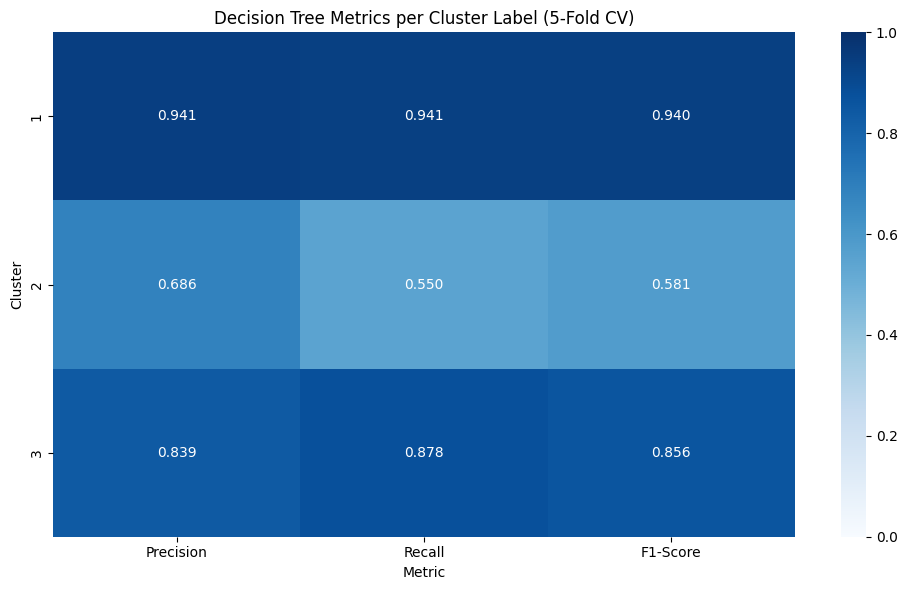

In [ ]:
# Create metrics dataframe for heatmap
metrics_df = pd.DataFrame({
    'Precision': avg_precision,
    'Recall': avg_recall,
    'F1-Score': avg_f1
}, index=class_names)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, cmap='Blues', fmt='.3f', vmin=0, vmax=1)
plt.title('Decision Tree Metrics per Cluster Label (5-Fold CV)')
plt.ylabel('Cluster')
plt.xlabel('Metric')
plt.tight_layout()
plt.show()

## Training a Decision Tree Model for extracting Decision Rules

Finally, the decision rules for the clustering at height cutoff 5.1 are retrieved. This is done by training a final decision tree on the entire dataset.

In [ ]:
# Split data and cluster label
X, y = df_interpret.drop('cluster', axis=1), df_interpret['cluster']

In [ ]:
# Create and train the Decision Tree
clf = DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

The top 5 features by feature importance of the decision tree are retrieved and plotted for visualization.

In [ ]:
top5_features_dt = np.argsort(clf.feature_importances_)[-5:][::-1]
print("Most important features in Decision Tree (descending):")
for i, v in enumerate(X.columns[top5_features_dt]):
  print(f"{i+1}: {v}")
print(" ")

Most important features in Decision Tree (descending):
1: Problem 28_1
2: Problem 24_3
3: Problem 17_2
4: Problem 15_2
5: Problem 22_0
 


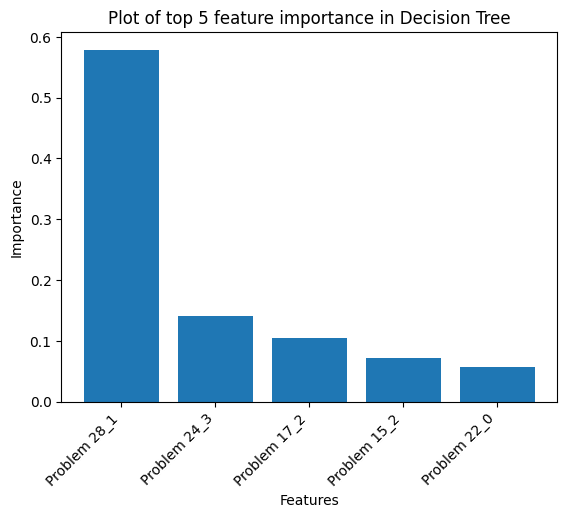

In [ ]:
top5cols = X.columns[top5_features_dt].values
top5vals = clf.feature_importances_[top5_features_dt]

# Plot the feature importances
plt.bar(top5cols, top5vals)
plt.xticks(rotation=45, ha='right')
plt.title("Plot of top 5 feature importance in Decision Tree")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

## Visualizing the Decision Tree

To retrieve the decision rules, the decision tree is visualized. A .dot file is additionally exported to allow for customization of the tree plot using a preferred software.

In [ ]:
# Export the tree into a .dot file
tree.export_graphviz(clf, out_file='treeA2.dot', feature_names=list(X.columns), filled=True)

[Text(0.5, 0.875, 'Problem 28_1 <= 0.5\ngini = 0.546\nsamples = 170\nvalue = [102, 20, 48]'),
 Text(0.25, 0.625, 'Problem 17_2 <= 0.5\ngini = 0.37\nsamples = 53\nvalue = [0, 13, 40]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Problem 15_2 <= 0.5\ngini = 0.408\nsamples = 14\nvalue = [0, 10, 4]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10, 0]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(0.375, 0.375, 'Problem 17_0 <= 0.5\ngini = 0.142\nsamples = 39\nvalue = [0, 3, 36]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4375, 0.125, 'gini = 0.1\nsamples = 38\nvalue = [0, 2, 36]'),
 Text(0.75, 0.625, 'Problem 24_3 <= 0.5\ngini = 0.232\nsamples = 117\nvalue = [102, 7, 8]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Problem 22_0 <= 0.5\ngini = 0.562\nsamples = 11\nvalue = [1, 4, 6]'),
 Text(0.5625, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [1, 4, 0]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples

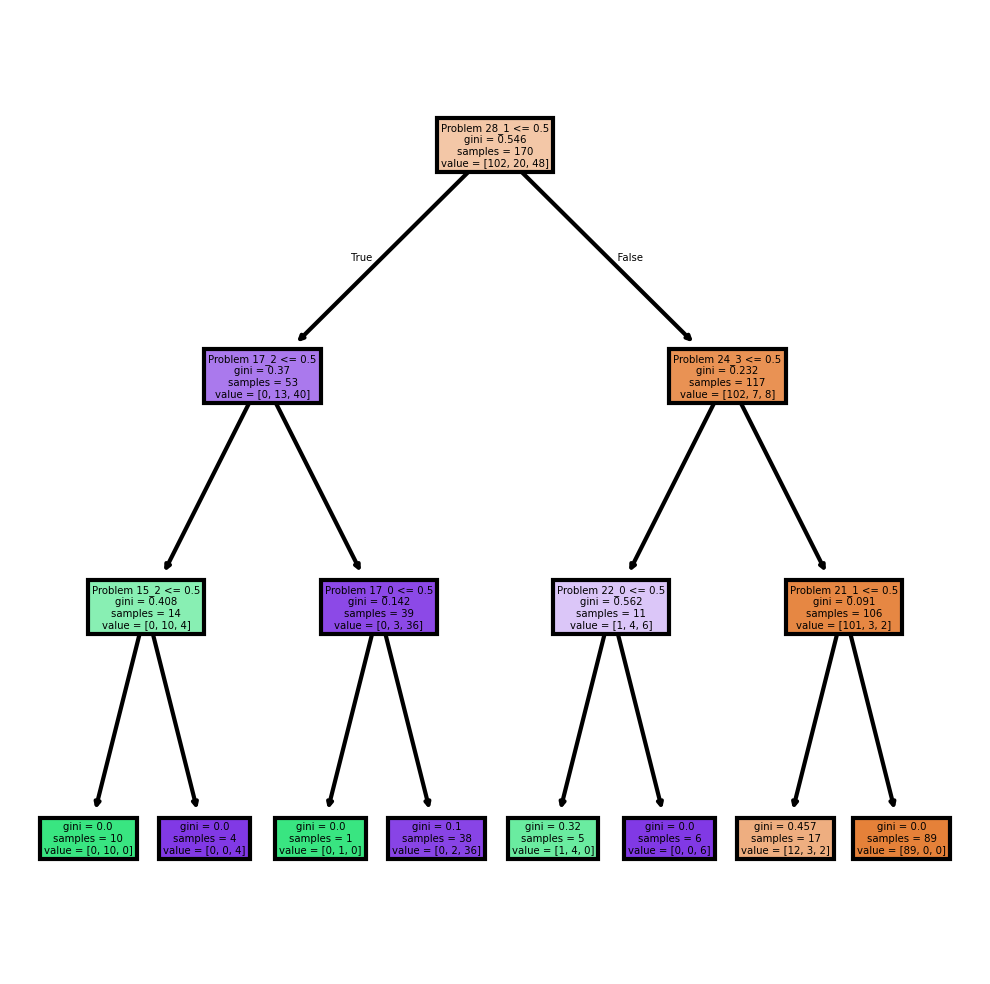

In [ ]:
# Visualize the decision tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
tree.plot_tree(clf, feature_names=list(X.columns), filled=True)